<a href="https://colab.research.google.com/github/mohan844/bike_sharing_demand_prediction/blob/main/Telco_Customer_Churn_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
link = '/content/drive/MyDrive/Almabetter/Machine Learning/Logistic Regression/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
df = pd.read_csv(link)

In [50]:
df.tail(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7013,1685-BQULA,Female,0,No,No,40,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.4,No
7014,9053-EJUNL,Male,0,No,No,41,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75,No
7015,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No
7016,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [73]:
def funct_to_float(i):
    try:
        float(i) == float(i)
        return float(i)
    except:
        return 0


In [74]:
df['TotalCharges'] = df['TotalCharges'].apply(funct_to_float)

In [86]:
df= df.drop(df.index[df['TotalCharges'] == 0])

In [87]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [77]:
df.drop(columns=['customerID'],axis=1,inplace=True)

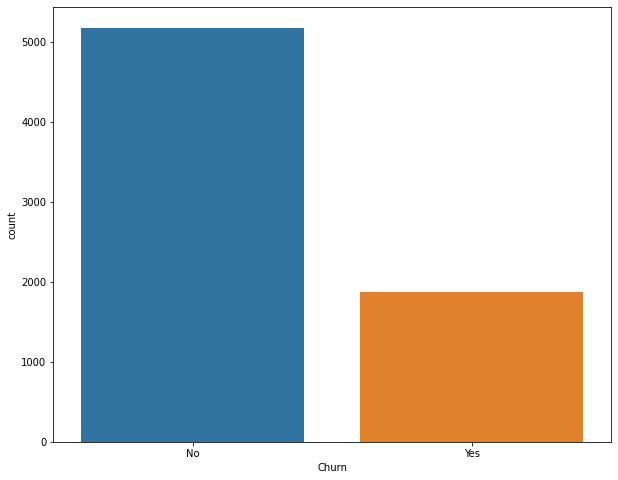

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Churn')

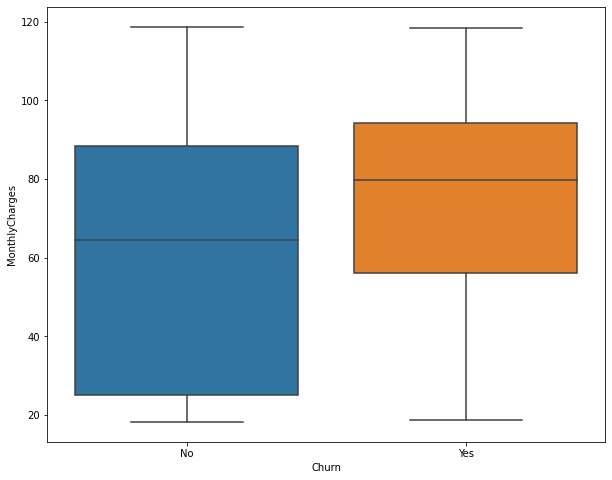

In [79]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,y='MonthlyCharges',x='Churn')

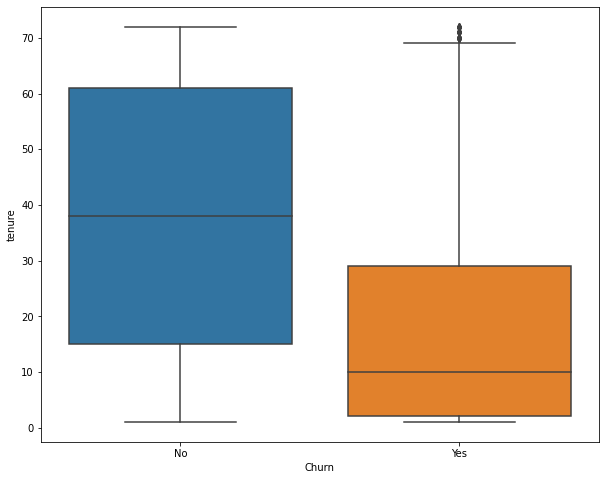

In [90]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,y='tenure',x='Churn')

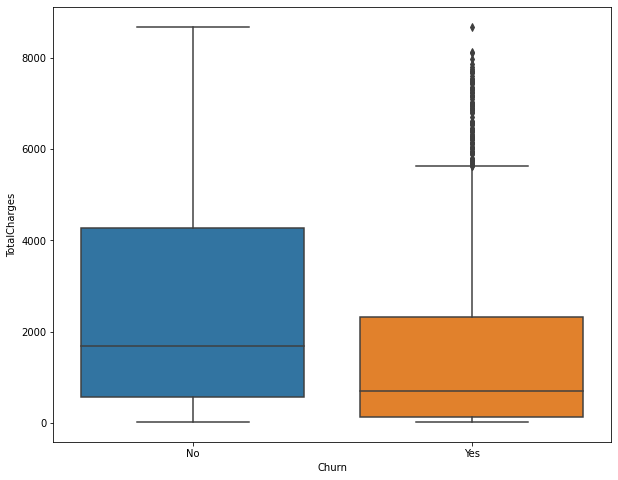

In [91]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,y='TotalCharges',x='Churn')

In [92]:
cat_col=list(set(df.columns) - set(df.describe().columns)-{'Churn'})
cat_col

['PhoneService',
 'Contract',
 'PaymentMethod',
 'MultipleLines',
 'Partner',
 'gender',
 'StreamingTV',
 'TechSupport',
 'PaperlessBilling',
 'InternetService',
 'OnlineBackup',
 'StreamingMovies',
 'DeviceProtection',
 'Dependents',
 'OnlineSecurity']

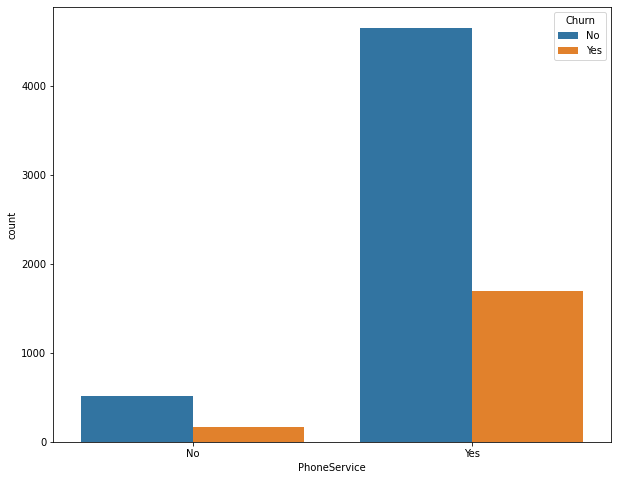

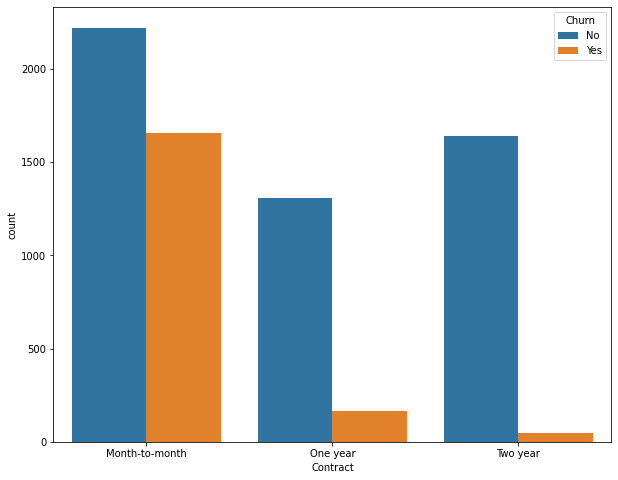

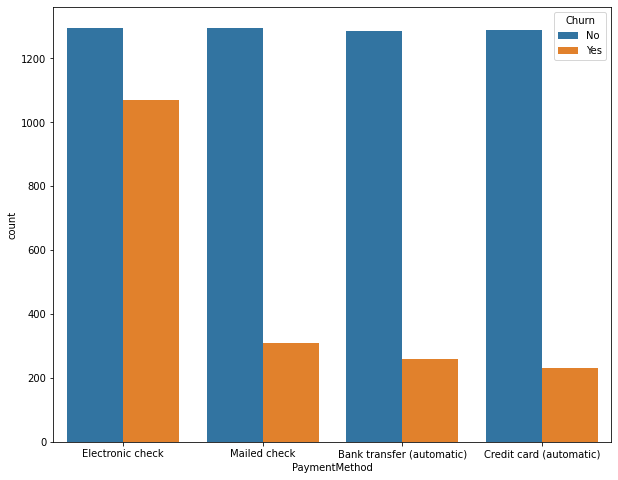

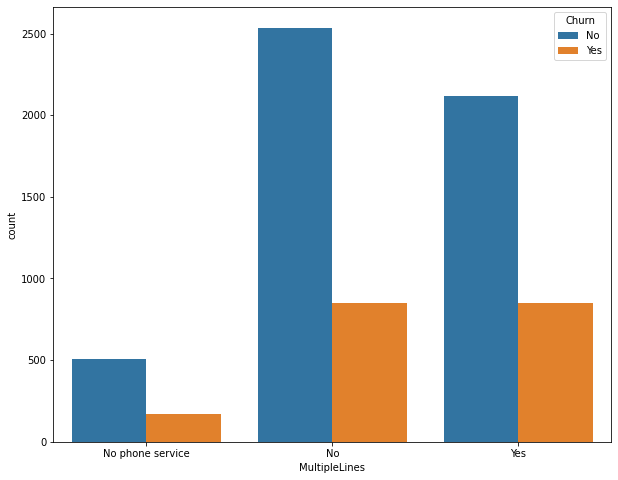

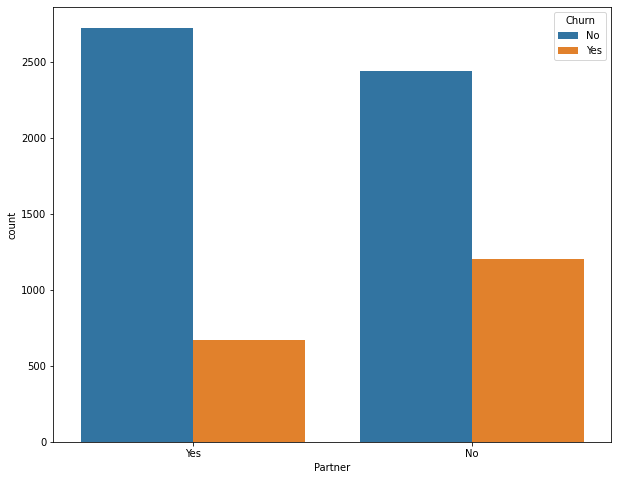

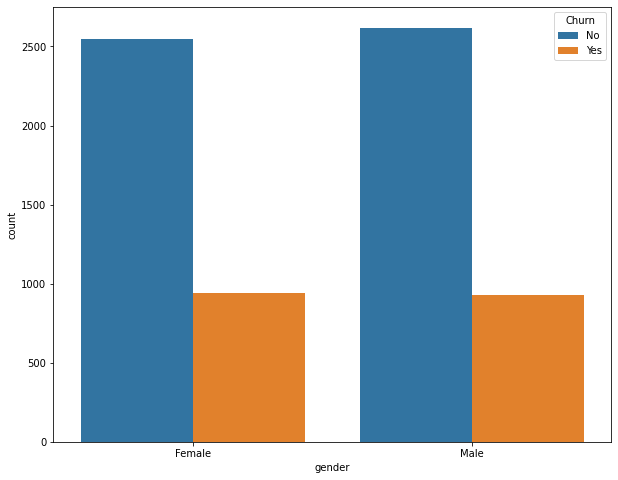

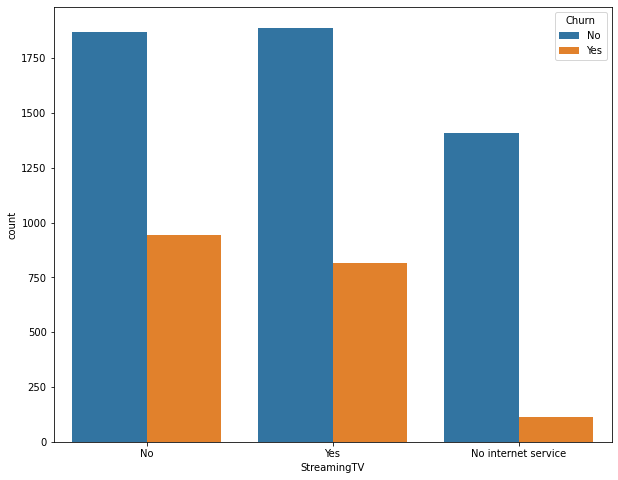

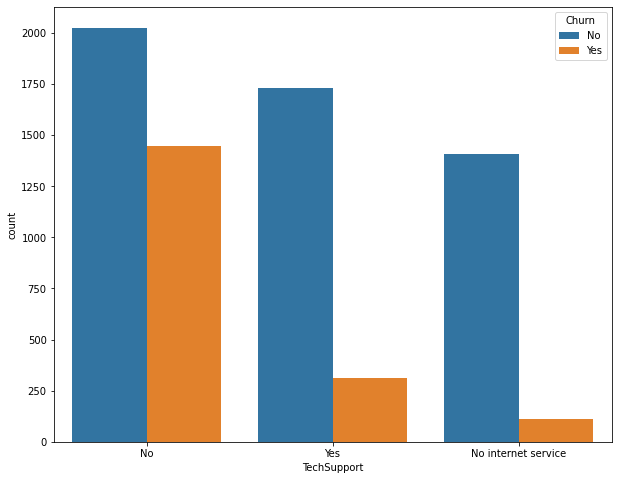

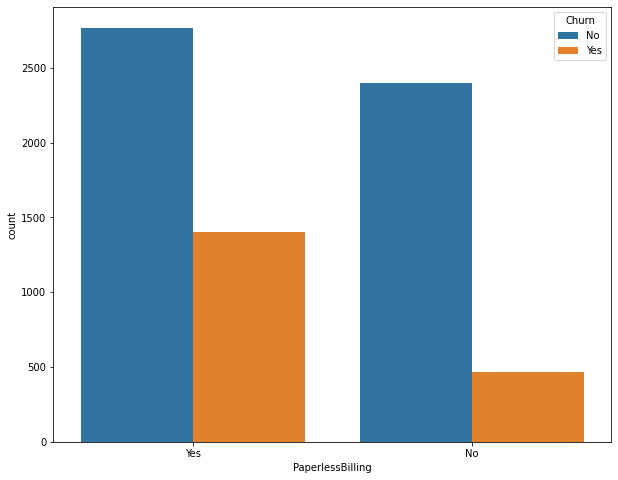

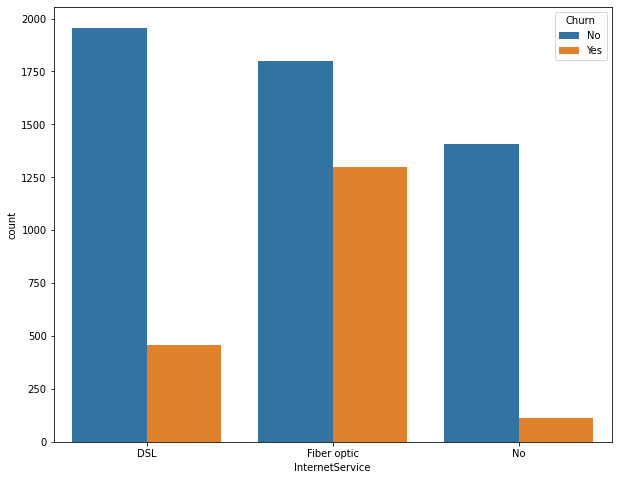

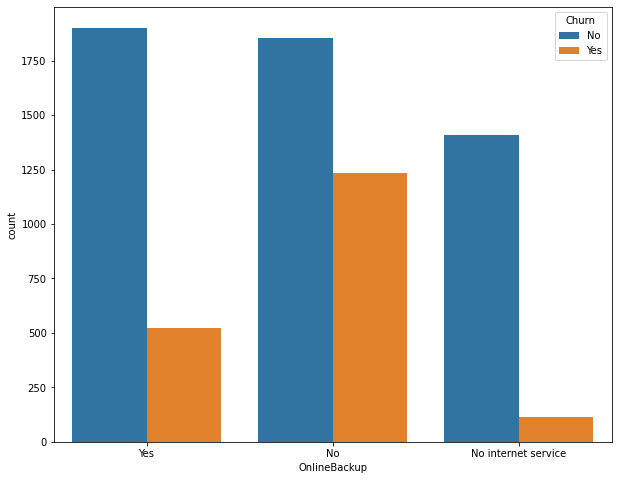

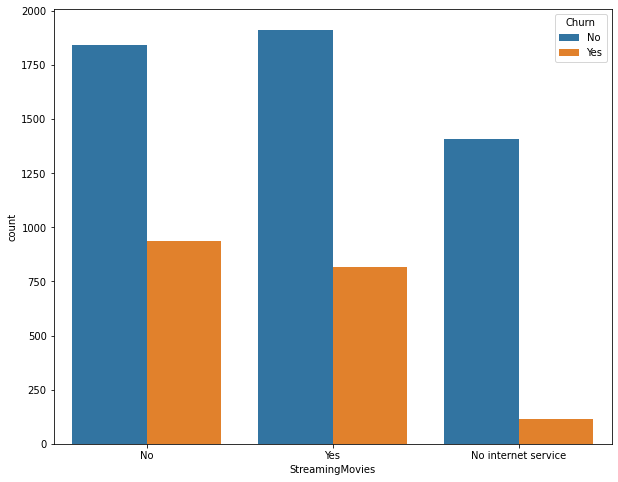

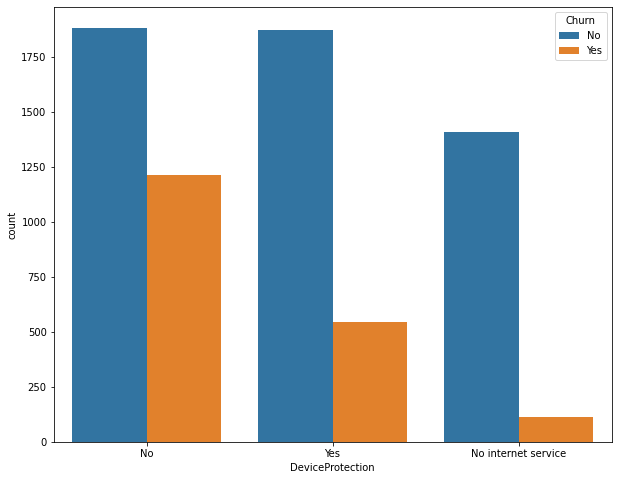

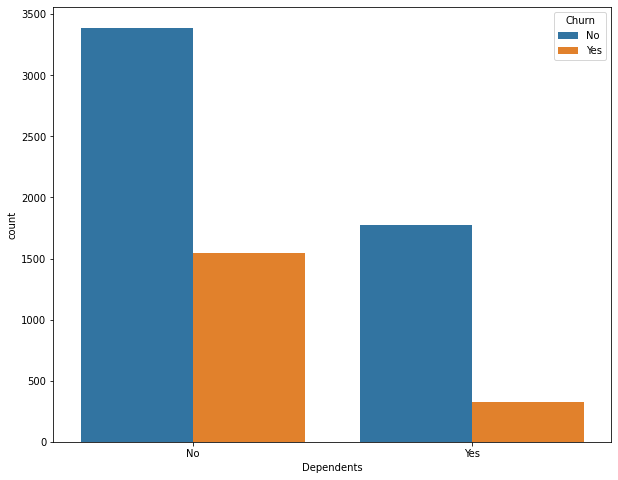

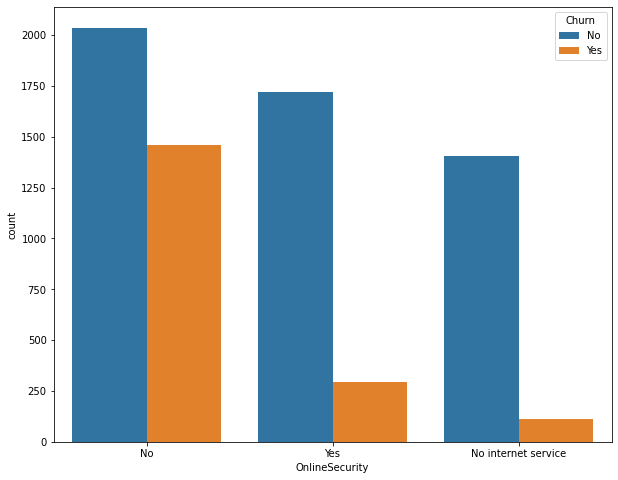

In [93]:
for i in cat_col:
  plt.figure(figsize=(10,8))
  sns.countplot(data=df,x=i,hue='Churn')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [97]:
df['gender'] = df['gender'].replace(to_replace = ['Male','Female'],value= [0,1])

In [99]:
df['Partner'] = df['Partner'].replace(to_replace = ['Yes','No'],value= [0,1])

In [101]:
df['Dependents'] = df['Dependents'].replace(to_replace = ['Yes','No'],value= [0,1])

In [102]:
df['PhoneService'] = df['PhoneService'].replace(to_replace = ['Yes','No'],value= [0,1])

In [104]:
df['MultipleLines'] = df['MultipleLines'].replace(to_replace = ['No phone service','Yes','No'],value= [0,1,2])

In [106]:
df['InternetService'] = df['InternetService'].replace(to_replace = ['DSL', 'Fiber optic', 'No'],value= [0,1,2])

In [108]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace(to_replace = ['No', 'Yes', 'No internet service'],value= [0,1,2])

In [110]:
df['OnlineBackup'] = df['OnlineBackup'].replace(to_replace = ['Yes', 'No', 'No internet service'],value= [0,1,2])

In [112]:
df['DeviceProtection'] = df['DeviceProtection'].replace(to_replace = ['No', 'Yes', 'No internet service'],value= [0,1,2])

In [115]:
df['TechSupport'] = df['TechSupport'].replace(to_replace = ['No', 'Yes', 'No internet service'],value= [0,1,2])

In [117]:
df['StreamingTV'] = df['StreamingTV'].replace(to_replace = ['No', 'Yes', 'No internet service'],value= [0,1,2])

In [119]:
df['StreamingMovies'] = df['StreamingMovies'].replace(to_replace = ['No', 'Yes', 'No internet service'],value= [0,1,2])

In [121]:
df['Contract'] = df['Contract'].replace(to_replace = ['Month-to-month', 'One year', 'Two year'],value= [0,1,2])

In [124]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace(to_replace = ['Yes', 'No'],value= [0,1])

In [126]:
df['PaymentMethod'] = df['PaymentMethod'].replace(to_replace = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],value= [0,1,2,3])

In [128]:
df['Churn'] = df['Churn'].replace(to_replace = ['Yes','No'],value= [0,1])

In [129]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,1
1,0,0,1,1,34,0,2,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,1
2,0,0,1,1,2,0,2,0,1,0,0,0,0,0,0,0,1,53.85,108.15,0
3,0,0,1,1,45,1,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,1
4,1,0,1,1,2,0,2,1,0,1,0,0,0,0,0,0,0,70.70,151.65,0


In [138]:
input = list(set(df.describe().columns) - {'Churn'})
output = ['Churn']

In [139]:
X = df[input]
y=df[output]

In [140]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5625, 19)
(1407, 19)


In [141]:
y_train.value_counts()

Churn
1        4125
0        1500
dtype: int64

In [142]:
y_test.value_counts()

Churn
1        1038
0         369
dtype: int64

In [143]:
4125/(4125 + 1500)

0.7333333333333333

In [144]:
1038/(1038 + 369)

0.7377398720682303

In [145]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [146]:
clf.coef_

array([[-6.80887794e-02,  6.70023293e-01, -2.82474053e-04,
         1.71726885e-01,  3.99503492e-01,  1.67409222e-02,
         3.55388964e-02, -5.85428607e-02,  5.95485482e-02,
         3.98526914e-01, -1.29483592e-02,  3.94979159e-01,
        -3.45358584e-01, -3.00641664e-01, -1.92363266e-01,
        -1.07427900e-01,  3.44298882e-02, -2.01911057e-01,
         3.70665964e-01]])

In [147]:
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [149]:
test_preds

array([[0.25501433, 0.74498567],
       [0.1193428 , 0.8806572 ],
       [0.16328164, 0.83671836],
       ...,
       [0.63272949, 0.36727051],
       [0.18163483, 0.81836517],
       [0.64215032, 0.35784968]])

In [150]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [152]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

In [153]:
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8037333333333333
The accuracy on test data is  0.8024164889836531
